Import the necessary software libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

/Users/anvesharaikwar/opt/anaconda3/envs/bmrl/lib/python3.8/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')


Initialize the Maze

In [3]:
env = Maze()

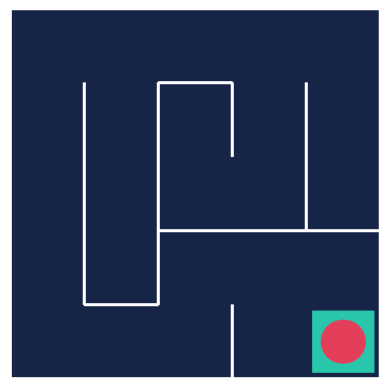

In [4]:
frame = env.render(mode = 'rgb_array')
plt.axis('off')
plt.imshow(frame)

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


# Define value table Q(s,a)

create the Q(s,a) table

In [6]:
action_values = np.zeros(shape=(5, 5, 4))

Plot Q(s,a)

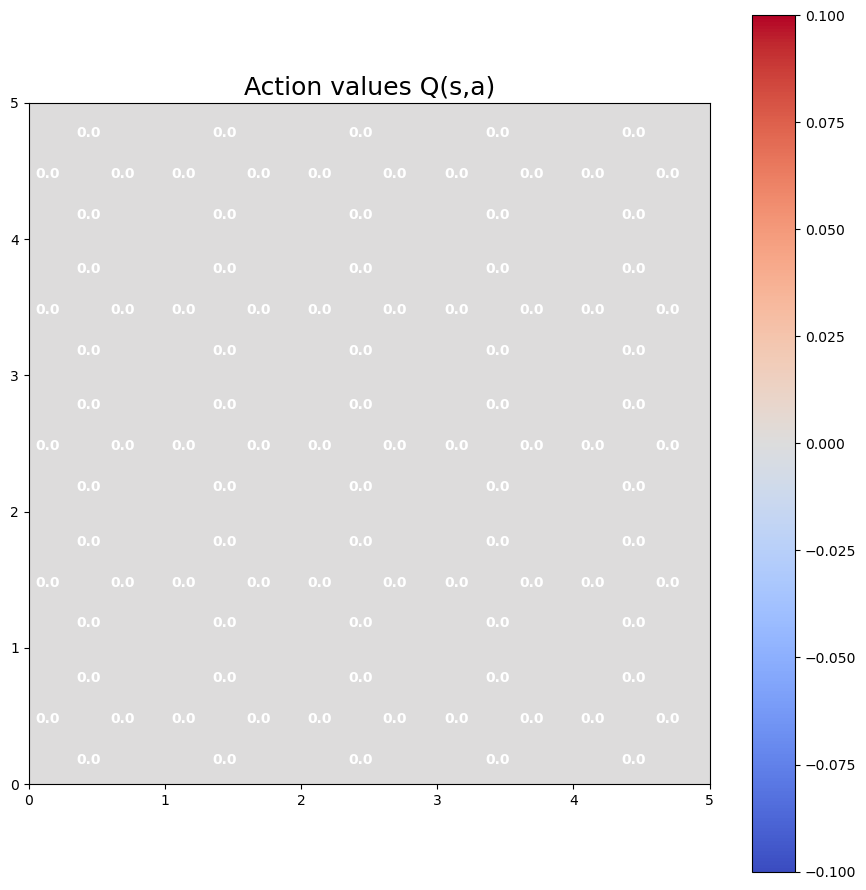

In [7]:
plot_action_values(action_values)

In [10]:
def policy(state, epsilon= 0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [11]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 0


Plot the policy

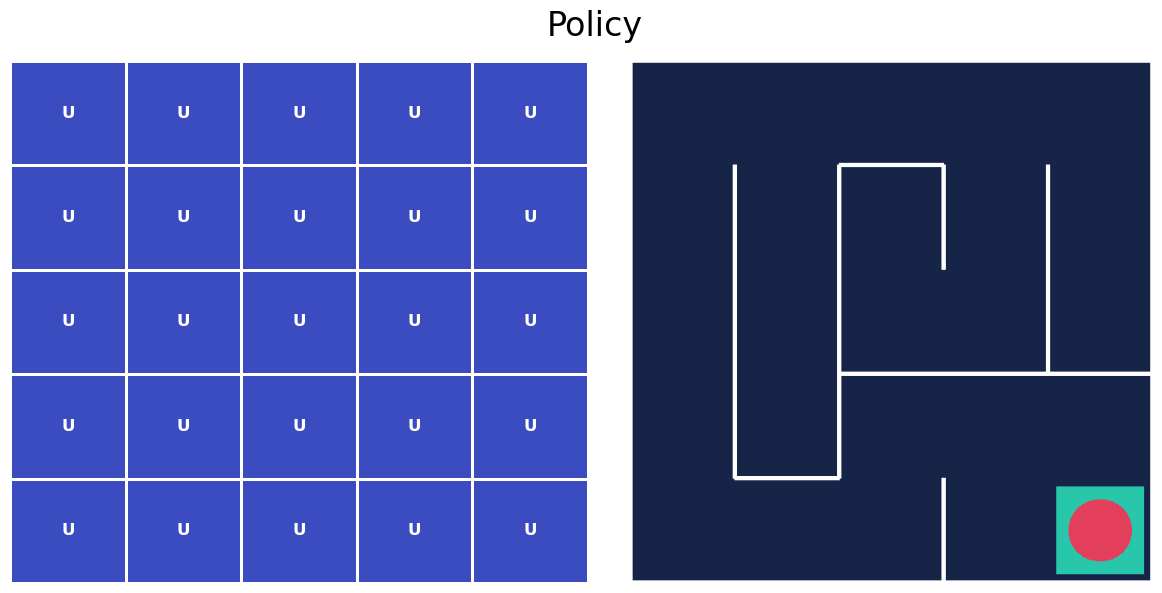

In [12]:
plot_policy(action_values, frame)

In [19]:
def constant_alpha_mc(policy, action_values, episodes, gamma=0.99, epsilon=0.2, alpha=0.1):
    sa_returns = {}
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state,action,reward])
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])

In [20]:
constant_alpha_mc(policy, action_values, episodes=1000)

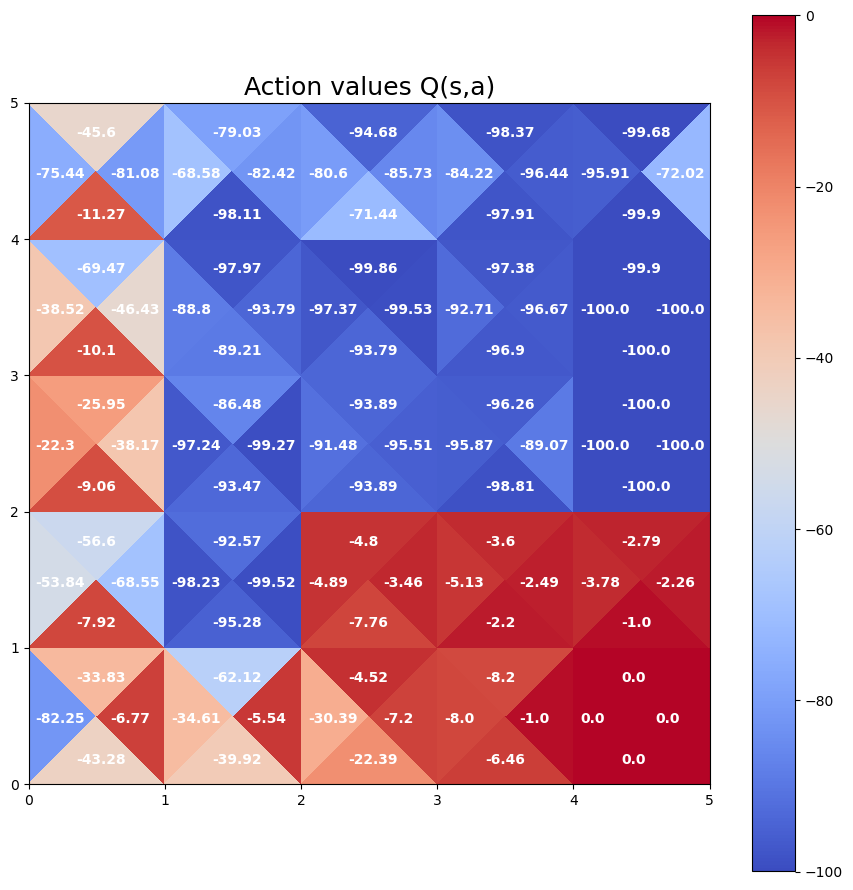

In [21]:
plot_action_values(action_values)

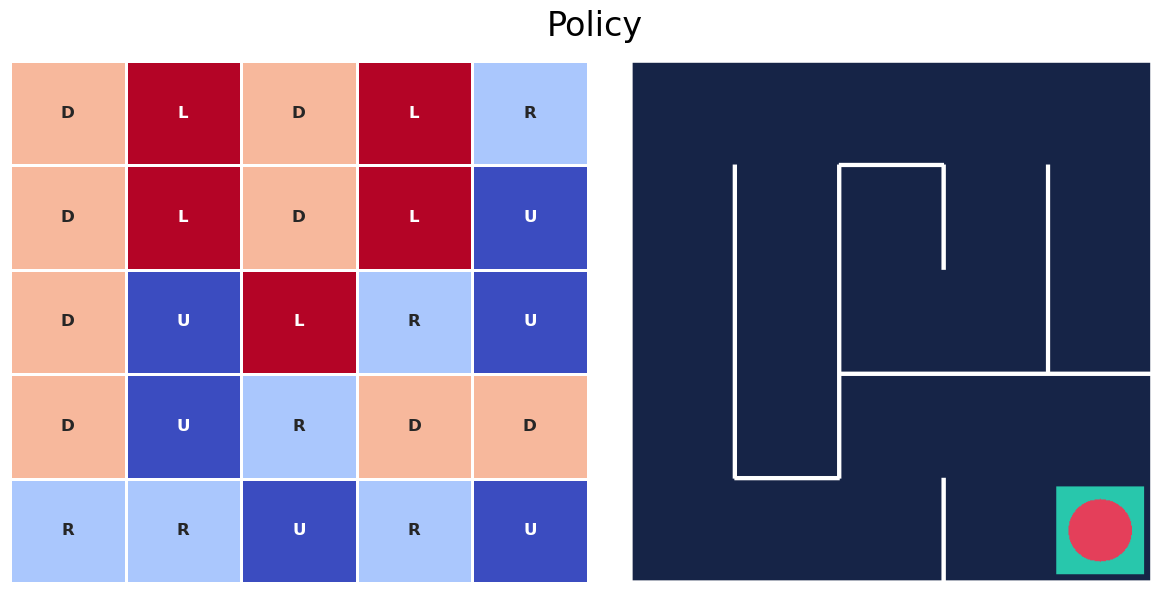

In [22]:
plot_policy(action_values, frame)

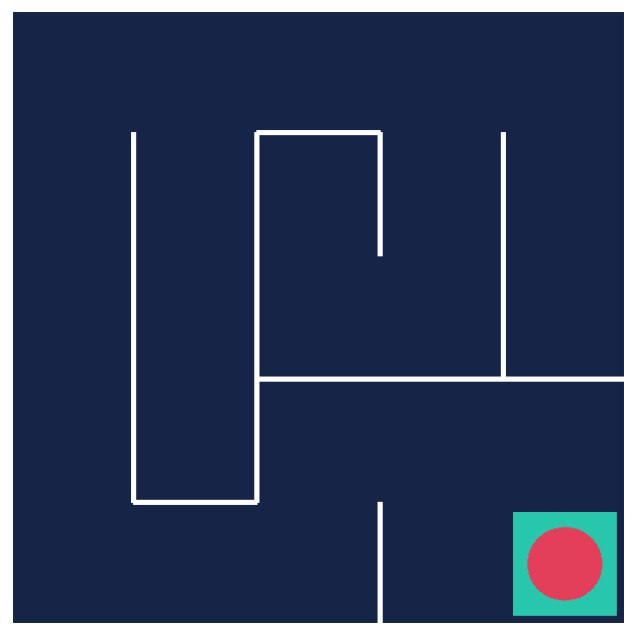

In [23]:
test_agent(env, policy)